In [16]:
%load_ext autoreload
%autoreload 2

from general.config import DatasetOptions, ProductIds
from general.experiment import Experiment
import tensorflow as tf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
dataset_options = DatasetOptions(
    data_origin="./../Data/merged_cleaned_FE_imputed(v)_w.csv",
    drop_columns=[
        "WeekoftheYear_cos",
        "WeekoftheYear_sin",
        "DayoftheYear_cos",
        "DayoftheYear_sin",
        "Month_cos",
        "Month_sin",
        "Season_Autumn",
        "Season_Spring",
        "Season_Summer",
        "Season_Winter",
    ],
    window_width=3,
    label_width=1,
    shift=1,
)

In [18]:
class Experiment1(Experiment):
    def compile_and_fit(self, model):
        model.compile(
            loss=tf.keras.losses.MeanSquaredError(),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=[tf.keras.metrics.MeanAbsoluteError()],
        )

        # TODO: Remove
        history = None
        # history = model.fit(
        #     self.data.train,
        #     epochs=50,
        #     validation_data=self.data.val,
        # )

        return history
    
    def get_train_settings(self):
        return {
            'Batch Size': 32,
            'Epochs': 50,
            'Learning Rate': 0.001,
            'Optimizer': 'Adam',
            "Shuffled Batches": "True",
        }
    
experiment = Experiment1("eperiment1", dataset_options)

In [19]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index, forecasting_width):
        super().__init__()
        self.label_index = label_index
        self.forecasting_width = forecasting_width

    def call(self, inputs):
        result = inputs[:, -self.forecasting_width :, self.label_index]
        return result[:, :, tf.newaxis]
    
baseline = Baseline(
    label_index=experiment.data.column_indices[ProductIds.BENS_LUNCHTIME.value],
    forecasting_width=1
)

Run model:  Persistence
  ... measuring performance:
----------------------------------
Statistics Saved.
Image Saved.
Experiment Info Saved.


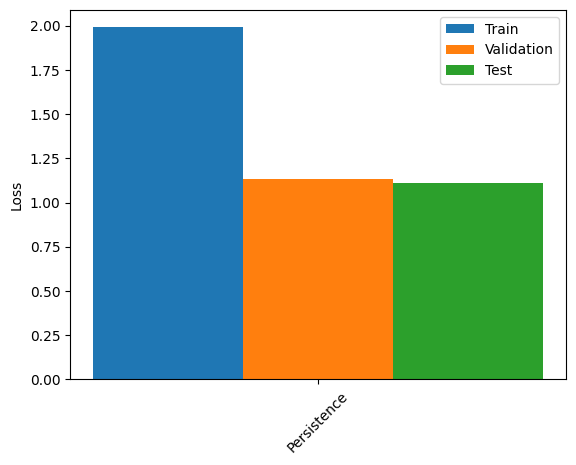

In [20]:
experiment.run({
    'Persistence': baseline
})